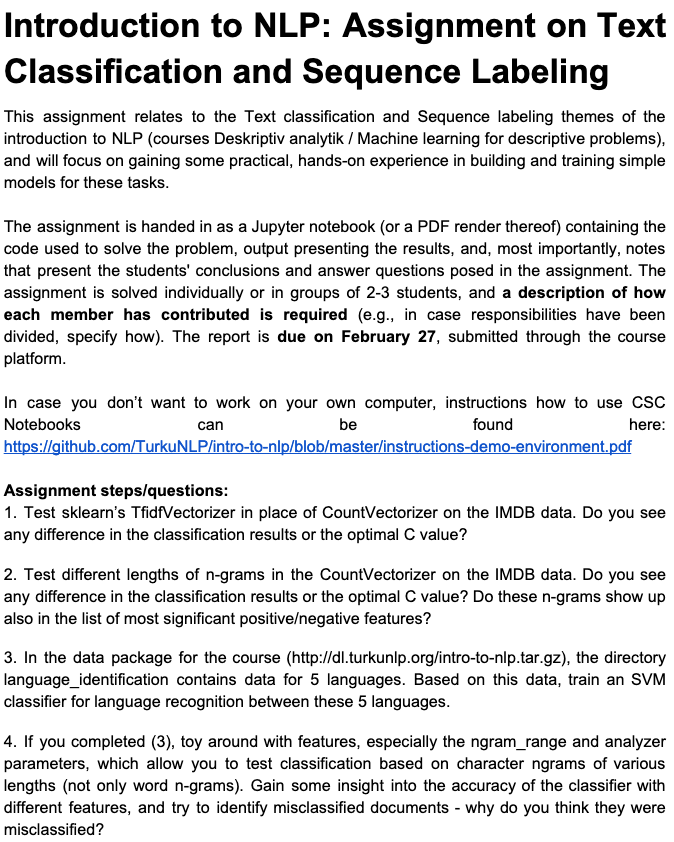

### 1. Test sklearn's TfidfVectorizer in place of CountVectorizer on the IMDB data. Do you see any difference in the classfication results or the optimal C value?

In [1]:
import json
import random

with open("imdb_train.json") as f:
    data=json.load(f)
random.shuffle(data) #play it safe! (why?)
print("class label:", data[0]["class"])
print("text:",data[0]["text"])

class label: neg
text: This waste of time is a completely unnecessary remake of a great film. Nothing new or original is added other than Perry's backflashes, which are of marginal interest. It lacks the documentary feel of the first film and the raw urgency that made it so effective. Also painfully missing is the sharp Quincy Jones soundtrack that added to much to the original film. I can't understand any high ratings for this at all. It's quite bad. Why does anyone waste time or money making crap like this and why did I waste time watching it?


In [2]:
texts=[one_example["text"] for one_example in data]
labels=[one_example["class"] for one_example in data]
print("This many texts",len(texts))
print("This many labels",len(labels))
print()
for label,text in list(zip(labels,texts))[:20]:
    print(label,text[:50]+"...")

This many texts 25000
This many labels 25000

neg This waste of time is a completely unnecessary rem...
neg Once big action star who fell off the face of the ...
pos This is one of those unfortunate films that suffer...
pos I should admit first I am a huge fan of The Dandy ...
pos A French film Ester Williams would love. But the s...
neg Sometimes I rest my head and think about the reaso...
neg After watching this movie I was honestly disappoin...
pos I saw this movie today and I have to say, it was m...
neg I'm not sure it was the language or the poor actin...
pos Not having read Nabokov, and knowing nothing about...
pos A number of Richard Attenborough's films as direct...
neg Who are these \They\"- the actors? the filmmakers?...
pos Sometimes you have to look back to go forward. The...
pos This is the second Animatrix short, and the first ...
pos The Sopranos is arguably the greatest show in Dram...
pos OK. I admit. I'm one of those nerds who have spent...
pos Home Room deals with a

In [3]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
feature_matrix = vectorizer.fit_transform(texts)
#print(vectorizer.get_feature_names())
print("shape=",feature_matrix.shape)
print("what did we get? ->", feature_matrix.__class__)
print(feature_matrix)

shape= (25000, 74849)
what did we get? -> <class 'scipy.sparse.csr.csr_matrix'>
  (0, 72259)	0.0761522703883791
  (0, 18292)	0.07040917299492536
  (0, 38755)	0.046641878010448105
  (0, 15340)	0.11505428991803283
  (0, 40441)	0.08680390498581561
  (0, 43572)	0.09381309824942874
  (0, 3715)	0.08929391625250468
  (0, 19421)	0.07158082036446854
  (0, 72965)	0.15156336507518375
  (0, 5502)	0.06470074239100505
  (0, 53042)	0.08233615326161421
  (0, 2662)	0.043629191432216295
  (0, 4753)	0.04391815757460063
  (0, 25450)	0.03535192296511108
  (0, 53605)	0.16305128763069804
  (0, 30902)	0.09542282015730562
  (0, 3703)	0.06530404367170942
  (0, 69390)	0.10190721455514615
  (0, 10357)	0.05176765578714711
  (0, 44241)	0.0598611339465241
  (0, 67125)	0.056299263321136016
  (0, 61845)	0.12186468923033583
  (0, 35510)	0.14149391374514436
  (0, 53009)	0.2116293282580784
  (0, 59365)	0.15515820325839114
  :	:
  (24999, 16746)	0.042813566533916096
  (24999, 73342)	0.030333214563364266
  (24999, 33004)	0

In [4]:
from sklearn.model_selection import train_test_split

train_texts, dev_texts, train_labels, dev_labels = train_test_split(texts,labels, test_size=0.2)
vectorizer = TfidfVectorizer(max_features=1000000, binary=True, ngram_range=(1,1))

feature_matrix_train = vectorizer.fit_transform(train_texts)
feature_matrix_dev = vectorizer.transform(dev_texts)

In [5]:
print("feature_matrix_train_shape=",feature_matrix_train.shape)
print("feature_matrix_dev_shape=",feature_matrix_dev.shape)
print(feature_matrix_train)

feature_matrix_train_shape= (20000, 68404)
feature_matrix_dev_shape= (5000, 68404)
  (0, 41484)	0.04506702808093958
  (0, 66328)	0.03249524791810385
  (0, 50493)	0.12293157764217504
  (0, 50512)	0.05501722532225016
  (0, 10924)	0.12183904138532206
  (0, 23046)	0.1343303241167773
  (0, 23632)	0.15052660803484744
  (0, 23650)	0.10673529372410488
  (0, 9131)	0.15052660803484744
  (0, 25166)	0.15052660803484744
  (0, 15213)	0.06583681716003945
  (0, 65285)	0.15052660803484744
  (0, 9737)	0.11389288927437463
  (0, 32585)	0.10875798029044945
  (0, 66056)	0.04244850318517114
  (0, 49191)	0.07000737341022299
  (0, 6400)	0.03872688409299574
  (0, 1506)	0.06116562215407983
  (0, 44768)	0.13701819838204643
  (0, 9430)	0.15052660803484744
  (0, 9338)	0.05661838771723625
  (0, 23959)	0.07045222375820458
  (0, 45514)	0.05904107508471504
  (0, 12692)	0.11897669771165079
  (0, 19212)	0.0740516093746557
  :	:
  (19999, 1474)	0.07723235667203689
  (19999, 40031)	0.061364124773475276
  (19999, 67384)	0.0

In [6]:
import sklearn.svm
classifier=sklearn.svm.LinearSVC(C=0.5,verbose=1)
classifier.fit(feature_matrix_train, train_labels)

[LibLinear]

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=1)

In [7]:
print("DEV",classifier.score(feature_matrix_dev, dev_labels))
print("TRAIN",classifier.score(feature_matrix_train, train_labels))

DEV 0.8942
TRAIN 0.98575


#### TfidfVectorizer Results:
##### ngram_range(1,1)(C=0.5)
DEV 0.8928
TRAIN 0.9839
##### ngram_range(1,1)(C=0.05)
DEV 0.8858
TRAIN 0.92205
##### ngram_range(1,1)(C=0.005)
DEV 0.8538
TRAIN 0.86725
##### ngram_range(1,1)(C=0.0005)
DEV 0.8362
TRAIN 0.84545


In [8]:
import sklearn.metrics
predictions_dev=classifier.predict(feature_matrix_dev)
print(predictions_dev)
print(sklearn.metrics.confusion_matrix(dev_labels,predictions_dev))
print(sklearn.metrics.accuracy_score(dev_labels,predictions_dev))

['pos' 'pos' 'pos' ... 'pos' 'pos' 'pos']
[[2187  274]
 [ 255 2284]]
0.8942


Comments: We got a better classification result with the TfidfVectorizer(Dev result range: 89-90%) when compared to the CountVectorizer result(Dev result: 86.5%) in the lecture notebook(https://github.com/TurkuNLP/intro-to-nlp/blob/master/bow_classifier.ipynb). When using the same C value(0.0005) for both Vectorizers, the TfidVectorizer results were initially worse than the CountVectorizer results in the lecture notebook, however, when adjusting the C value for the TfidfVectorizer to 0.5 the results then improved significantly. 

### 2. Test different lengths of n-grams in the CountVectorizer on the IMDB data. Do you see any difference in the classification results or optimal C value? Do these n-grams show up also in the list of most significant positive/negative features?

In [86]:
TrainTexts, DevTexts, TrainLabels, DevLabels = train_test_split(texts,labels,test_size=0.2)
Vectorizer=CountVectorizer(max_features=1000000, binary=True,ngram_range=(1,2))
FeatureMatrixTrain=Vectorizer.fit_transform(TrainTexts)
FeatureMatrixDev=Vectorizer.transform(DevTexts)

In [87]:
print(FeatureMatrixTrain.shape)
print(FeatureMatrixDev.shape)
print(FeatureMatrixTrain)

(20000, 1000000)
(5000, 1000000)
  (0, 565404)	1
  (0, 408189)	1
  (0, 471258)	1
  (0, 983721)	1
  (0, 289696)	1
  (0, 342857)	1
  (0, 398499)	1
  (0, 412319)	1
  (0, 391079)	1
  (0, 101537)	1
  (0, 236594)	1
  (0, 452333)	1
  (0, 576125)	1
  (0, 57142)	1
  (0, 804149)	1
  (0, 632376)	1
  (0, 483456)	1
  (0, 845926)	1
  (0, 623235)	1
  (0, 866991)	1
  (0, 190281)	1
  (0, 87339)	1
  (0, 406220)	1
  (0, 843457)	1
  (0, 728619)	1
  :	:
  (19999, 818645)	1
  (19999, 983172)	1
  (19999, 825762)	1
  (19999, 658482)	1
  (19999, 640852)	1
  (19999, 693143)	1
  (19999, 42914)	1
  (19999, 647247)	1
  (19999, 652761)	1
  (19999, 251080)	1
  (19999, 825869)	1
  (19999, 708193)	1
  (19999, 178445)	1
  (19999, 507160)	1
  (19999, 148476)	1
  (19999, 685967)	1
  (19999, 703402)	1
  (19999, 748582)	1
  (19999, 889532)	1
  (19999, 995360)	1
  (19999, 647245)	1
  (19999, 818453)	1
  (19999, 658509)	1
  (19999, 529095)	1
  (19999, 246238)	1


In [90]:
Classifier=sklearn.svm.LinearSVC(C=0.005,verbose=1)
Classifier.fit(FeatureMatrixTrain, TrainLabels)

[LibLinear]

LinearSVC(C=0.005, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=1)

In [91]:
print("DEV",Classifier.score(FeatureMatrixDev, DevLabels))
print("TRAIN",Classifier.score(FeatureMatrixTrain, TrainLabels))

DEV 0.8876
TRAIN 0.9986


#### CountVectorizer results with word features:
---
##### ngram_range(1,1)(C=0.05)
Dev: 0.8656 /
Train: 0.9961
##### ngram_range(1,1)(C=0.005)
Dev: 0.8784 /
Train: 0.95835
##### ngram_range(1,1)(C=0.0005)
Dev: 0.862 /
Train: 0.8971

---
##### ngram_range(1,2)(C=0.05)
Dev: 0.8922 /
Train: 1.0
##### ngram_range(1,2)(C=0.005)
Dev: 0.8918 /
Train: 0.9984
##### ngram_range(1,2)(C=0.0005)
Dev: 0.8826 /
Train: 0.9499

---
##### ngram_range(1,3)(C=0.05)
Dev: 0.9012 /
Train: 1.0
##### ngram_range(1,3)(C=0.005)
Dev: 0.9002 /
Train: 0.99965
##### ngram_range(1,3)(C=0.0005)
Dev: 0.8916 /
Train: 0.96065

In [92]:
PredictionsDev=Classifier.predict(FeatureMatrixDev)
print(PredictionsDev)
print(sklearn.metrics.confusion_matrix(DevLabels,PredictionsDev))
print(sklearn.metrics.accuracy_score(DevLabels,PredictionsDev))

['neg' 'pos' 'pos' ... 'pos' 'neg' 'pos']
[[2195  307]
 [ 255 2243]]
0.8876


In [93]:
index2feature={}
for feature,idx in Vectorizer.vocabulary_.items():
    assert idx not in index2feature #This really should hold
    index2feature[idx]=feature

In [94]:
lst=[]
for idx,weight in enumerate(Classifier.coef_[0]):
    lst.append((weight,idx))
lst.sort() #sort

#Print first few and last few
for weight,idx in lst[:30]: #first 30 (ie lowest weight)
    print(index2feature[idx])
print("----------------------------------------------------")
#Take the last 30 (lst[-30:]) but these now come from weakest to strongest
#so reverse the list using [::-1]
for weight,idx in lst[-30:][::-1]:
    print(index2feature[idx])

worst
awful
boring
bad
waste
the worst
terrible
poor
disappointing
disappointment
poorly
horrible
annoying
dull
worse
unfortunately
mess
ridiculous
lacks
lame
at best
badly
not worth
stupid
nothing
oh
save
basically
predictable
disappointed
----------------------------------------------------
excellent
perfect
great
wonderful
enjoyable
enjoyed
amazing
better than
superb
liked
fun
today
rare
loved
must see
beautiful
gem
fantastic
brilliant
bit
incredible
definitely
love
10 10
the best
perfectly
surprisingly
recommended
pretty good
favorite


comments: Using ngram_range(1,2) gave me a slightly better result than ngram_range(1,1). However, in our tests we found the optimal C value to be the same for both ngram_ranges. I also tried ngram_range(1,3), however, it did not yield any improvements. Looking at the list of most positive/negative features we can see that the list if mostly dominated by unigrams accompanied by a few bigrams.

### 3. In the data package for the course, the directory language_identification contains data for 5 languages. Based on this data, train an SVM classifier for language recognition between these 5 languages. 

In [16]:
import random
import glob

path = './language_files/*.txt'   
files=glob.glob(path)

data = []

for file in files: 
    file_str = file
    #print(file)
    file = open(file, 'r') 
    for line in file:
        #print(line)
        line = line.replace('\n', '')
        if "pt_" in file_str:
            data.append({"class": "PT", "text": line})
        elif "en_" in file_str:
            data.append({"class": "EN", "text": line})
        elif "es_" in file_str:
            data.append({"class": "ES", "text": line})
        elif "fi_" in file_str:
            data.append({"class": "FI", "text": line})
        elif "et_" in file_str:
            data.append({"class": "ET", "text": line})
            
random.shuffle(data)
print("class label:", data[0]["class"])
print("text:",data[0]["text"])
type(data[0])

class label: ET
text: " Oot, ma teen lahti"


dict

In [17]:
print(data[0])

{'class': 'ET', 'text': '" Oot, ma teen lahti"'}


In [18]:
lang_texts=[one_example["text"] for one_example in data]
lang_labels=[one_example["class"] for one_example in data]
print("This many texts",len(texts))
print("This many labels",len(labels))
print()

for label,text in list(zip(lang_labels,lang_texts))[:20]:
    print(label,text[:50]+"...")
    


This many texts 25000
This many labels 25000

ET " Oot, ma teen lahti"...
ET Keegi liikus koridoris....
EN Taking into consideration this class of customer, ...
PT A lanchonete é simples, mas faz um saboroso cachor...
PT Segundo porque introduzirá mudanças em os programa...
ET Kõrgete palkade ja pensionide kriitikale vastates ...
EN Rude service...
FI Hintojen odotetaan vuoden kuluessa kuitenkin kohoa...
EN This is a $200 million increase over what NASA rec...
ES ¿ Instituciones o psicópatas?...
PT Por o grupo brazuca, ainda estarão presentes Tyes ...
ES Come una amplia variedad de pequeñas criaturas....
ET Saaremaal Harilaiul lasti ühe soomlase hütike sell...
ES La esposa del de el presidente francés no dio la a...
PT Negou ainda que as suas divergências com Pinto Mac...
ES En este tiempo eran sobre todo parte del de el equ...
EN I explained to him what I wanted and that I previo...
ET Peale funktsionaalse külje on ühel uhkel sirmil ka...
EN Do your self a favor and do not go to this 

In [59]:
traintexts, devtexts, trainlabels, devlabels=train_test_split(lang_texts,lang_labels,test_size=0.2)
verizer=TfidfVectorizer(max_features=1000000, binary=True, ngram_range=(1,2), analyzer='char_wb')
featurematrixtrain=verizer.fit_transform(traintexts)
featurematrixdev=verizer.transform(devtexts)
print(featurematrixtrain.shape)
print(featurematrixdev.shape)
print(featurematrixtrain)

(12000, 3057)
(3000, 3057)
  (0, 1980)	0.31038956267448026
  (0, 1034)	0.26659499392451363
  (0, 1199)	0.3199470488851389
  (0, 1796)	0.3198261302272345
  (0, 1283)	0.2264557246180656
  (0, 1661)	0.28458544484751097
  (0, 1028)	0.25109130335154733
  (0, 1139)	0.3428761292636846
  (0, 36)	0.28210986096657326
  (0, 1979)	0.16677372652800854
  (0, 1177)	0.18119577437370146
  (0, 1772)	0.15739723554685622
  (0, 1243)	0.15120161604308432
  (0, 1639)	0.16466937547290342
  (0, 990)	0.1502965451764202
  (0, 1119)	0.23749552857852968
  (0, 0)	0.14516284042063268
  (1, 414)	0.029321217309259566
  (1, 1782)	0.09279182428813344
  (1, 1520)	0.04014944725193063
  (1, 1870)	0.05770889646613349
  (1, 1575)	0.07839672739352659
  (1, 2010)	0.11365836838764903
  (1, 413)	0.028677846285994638
  (1, 1557)	0.04780956096789061
  :	:
  (11999, 1030)	0.0991539789892325
  (11999, 1490)	0.064738085811992
  (11999, 37)	0.11487739673146538
  (11999, 2089)	0.1599951918492062
  (11999, 2095)	0.1552395715477072
  (11

In [66]:
clazzifier=sklearn.svm.LinearSVC(C=0.005,verbose=1)
clazzifier.fit(featurematrixtrain, trainlabels)

[LibLinear]

LinearSVC(C=0.005, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=1)

In [67]:
print("Dev:",clazzifier.score(featurematrixdev, devlabels))
print("Train:",clazzifier.score(featurematrixtrain, trainlabels))

Dev: 0.975
Train: 0.975


In [70]:
predictionsdev=clazzifier.predict(featurematrixdev)
print(predictionsdev)
print(sklearn.metrics.confusion_matrix(devlabels,predictionsdev))
print(sklearn.metrics.accuracy_score(devlabels,predictionsdev))

['ET' 'EN' 'FI' ... 'ES' 'PT' 'ES']
[[587   0   7   1   4]
 [  5 608   2   0   4]
 [  6   0 575   7   0]
 [  7   0  13 604   0]
 [ 11   7   1   0 551]]
0.975


### 4. If you completed (3), toy around with features, especially the ngram_range and analyzer parameters, which allow you to test classification based on character ngrams of various lengths(not only word ngrams). Gain some insight into the accuracy of the classifier with different features, and try to identify missclassified documents - why do you think they were missclassified?
---

#### CountVectorizer results with word features:
---
##### ngram_range(1,1)(C=0.05)
Dev: 0.951 /
Train: 0.99475
##### ngram_range(1,1)(C=0.005)
Dev: 0.9253333333333333 /
Train: 0.94975
##### ngram_range(1,1)(C=0.0005)
Dev: 0.8863333333333333 /
Train: 0.9011666666666667

---
##### ngram_range(1,2)(C=0.05)
Dev: 0.948 /
Train: 0.997
##### ngram_range(1,2)(C=0.005)
Dev: 0.923 /
Train: 0.9584166666666667
##### ngram_range(1,2)(C=0.0005)
Dev: 0.8883333333333333 /
Train: 0.9080833333333334

---
##### ngram_range(1,3)(C=0.05)
Dev: 0.948 /
Train: 0.9970833333333333
##### ngram_range(1,3)(C=0.005)
Dev: 0.929 /
Train: 0.9628333333333333
##### ngram_range(1,3)(C=0.0005)
Dev: 0.894 /
Train: 0.91625

---
#### TfidfVectorizer results with word features:
---
##### ngram_range(1,1)(C=0.5)
Dev: 0.962 /
Train: 0.9986666666666667
##### ngram_range(1,1)(C=0.05)
Dev: 0.9496666666666667 /
Train: 0.9799166666666667
##### ngram_range(1,1)(C=0.005)
Dev: 0.9336666666666666 /
Train: 0.95075
##### ngram_range(1,1)(C=0.0005)
Dev: 0.923 /
Train: 0.94

---
##### ngram_range(1,2)(C=0.5)
Dev: 0.9686666666666667 /
Train: 0.9988333333333334
##### ngram_range(1,2)(C=0.05)
Dev: 0.961 /
Train: 0.9933333333333333
##### ngram_range(1,2)(C=0.005)
Dev: 0.95 /
Train: 0.9701666666666666
##### ngram_range(1,2)(C=0.0005)
Dev: 0.8933333333333333 /
Train: 0.8819166666666667

---
##### ngram_range(1,3)(C=0.5)
Dev: 0.965 /
Train: 0.9989166666666667
##### ngram_range(1,3)(C=0.05)
Dev: 0.956 /
Train: 0.9953333333333333
##### ngram_range(1,3)(C=0.005)
Dev: 0.9426666666666667 /
Train: 0.9761666666666666
##### ngram_range(1,3)(C=0.0005)
Dev: 0.8806666666666667 /
Train: 0.8653333333333333

---
#### TfidfVectorizer results with character features:
---
##### ngram_range(1,1)(C=5)
Dev: 0.905 /
Train: 0.912
##### ngram_range(1,1)(C=0.5)
Dev: 0.9003333333333333 /
Train: 0.9100833333333334
##### ngram_range(1,1)(C=0.05)
Dev: 0.8946666666666667 /
Train: 0.9
##### ngram_range(1,1)(C=0.005)
Dev: 0.8793333333333333 /
Train: 0.88075

---
##### ngram_range(1,2)(C=5)
Dev: 0.98 /
Train: 0.9994166666666666
##### ngram_range(1,2)(C=0.5)
Dev: 0.9813333333333333 /
Train: 0.995
##### ngram_range(1,2)(C=0.05)
Dev: 0.9763333333333334 /
Train: 0.98475
##### ngram_range(1,2)(C=0.005)
Dev: 0.9676666666666667 / Train: 0.97525

---
##### ngram_range(1,3)(C=5)
Dev: 0.9866666666666667 /
Train: 1.0
##### ngram_range(1,3)(C=0.5)
Dev: 0.988 /
Train: 0.9996666666666667
##### ngram_range(1,3)(C=0.05)
Dev: 0.9863333333333333 /
Train: 0.9919166666666667
##### ngram_range(1,3)(C=0.005)
Dev: 0.982 /Train: 0.9815

---
#### TfidfVectorizer results with inside word boundary features:
---
##### ngram_range(1,1)(C=5)
Dev: 0.9036666666666666 / Train: 0.9150833333333334
##### ngram_range(1,1)(C=0.5)
Dev: 0.897 / Train: 0.9099166666666667
##### ngram_range(1,1)(C=0.05)
Dev: 0.8916666666666667 / Train: 0.90075
##### ngram_range(1,1)(C=0.005)
Dev: 0.8723333333333333 / Train: 0.8815

---
##### ngram_range(1,2)(C=5)
Dev: 0.976 / Train: 0.9995833333333334
##### ngram_range(1,2)(C=0.5)
Dev: 0.9826666666666667 / Train: 0.9948333333333333
##### ngram_range(1,2)(C=0.05)
Dev: 0.9803333333333333 / Train: 0.9850833333333333
##### ngram_range(1,2)(C=0.005)
Dev: 0.975 / Train: 0.975

---
##### ngram_range(1,3)(C=5)
Dev: 0.99 / Train: 1.0
##### ngram_range(1,3)(C=0.5)
Dev: 0.9913333333333333 /Train: 0.9990833333333333
##### ngram_range(1,3)(C=0.05)
Dev: 0.985 / Train: 0.9830833333333333
##### ngram_range(1,3)(C=0.005)
Dev: 0.985 / Train: 0.9830833333333333

In [84]:
import numpy as np

y_test = np.asarray(trainlabels)
misclassified = np.where(y_test != clazzifier.predict(featurematrixtrain))
print(misclassified)

(array([   21,    33,   107,   114,   132,   133,   162,   228,   231,
         239,   361,   399,   469,   551,   596,   608,   641,   689,
         788,   808,   809,   966,   986,  1015,  1022,  1059,  1073,
        1078,  1085,  1088,  1104,  1121,  1137,  1150,  1178,  1210,
        1211,  1227,  1253,  1266,  1275,  1277,  1368,  1397,  1438,
        1444,  1452,  1558,  1584,  1620,  1655,  1766,  1861,  1878,
        1944,  1948,  2059,  2090,  2197,  2233,  2307,  2337,  2407,
        2426,  2494,  2498,  2560,  2663,  2684,  2744,  2766,  2926,
        2934,  2997,  3038,  3052,  3069,  3073,  3075,  3192,  3308,
        3385,  3409,  3444,  3451,  3480,  3565,  3574,  3588,  3615,
        3641,  3642,  3666,  3794,  3817,  3938,  3944,  4024,  4057,
        4123,  4166,  4207,  4248,  4251,  4275,  4328,  4380,  4389,
        4406,  4474,  4553,  4609,  4649,  4658,  4713,  4737,  4739,
        4743,  4764,  4822,  4828,  4832,  4911,  4928,  4947,  4951,
        5032,  5068

In [85]:
print(traintexts[21])
print(traintexts[33])
print(traintexts[107])
print(traintexts[114])
print(traintexts[132])
print(traintexts[133])

SMITH KLINE 31,6
Coincidentemente, Jason também levou o maior número de balas( 132), contra 27 de Michael Myers e apenas seis de Freddy Krueger.
LOL Callum
Juho nousi ja asteli ovelle.
Justin
Lleva por número KV 621.


Comments: We ran a lot of tests with different ngram_range, and C values, and analyzer parameters. We were able to produce decent results in most cases, however, we got the best results(Dev: 99%) with the TfidfVectorizer and ngram_range(1,3), C=0.5, and analyzer parameter of wb_bound. We also analyzed some misclassified documents to try and find out what may have caused them to get misclassified. We think the main reason a document might get misclassified is that it's very short, contains one or more names, numbers, abbreviations, and internet slang. 